In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [4]:
#Read my excel file using pandas 
df = pd.read_excel(r"D:\ARUL\Data_Science\Project-2\ICRISAT-District Level Data.xlsx")
df.head(10)

,Dist Code,Year,State Code,State Name,Dist Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
0,1,1966,14,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,...,1777.78,0.0,0.0,0.0,5.95,6.64,12.59,0.01,0.60,0.47
1,1,1967,14,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,...,1500.00,0.0,0.0,0.0,5.77,7.24,13.02,0.01,0.56,1.23
2,1,1968,14,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,...,1000.00,0.0,0.0,0.0,5.41,7.40,12.81,0.10,0.58,1.02
3,1,1969,14,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,...,1900.00,0.0,0.0,0.0,5.52,7.16,12.69,0.01,0.56,0.84
4,1,1970,14,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,...,2000.00,0.0,0.0,0.0,5.45,7.19,12.64,0.02,0.52,0.42
5,1,1971,14,Chhattisgarh,Durg,581.8,412.9,709.69,44.4,25.8,...,2000.00,0.0,0.0,0.0,5.42,7.48,12.91,0.01,0.54,0.38
6,1,1972,14,Chhattisgarh,Durg,582.2,381.0,654.41,39.6,20.6,...,2000.00,0.0,0.0,0.0,5.48,7.53,13.01,0.01,0.55,0.26
7,1,1973,14,Chhattisgarh,Durg,600.0,471.9,786.50,37.3,18.6,...,6000.00,0.0,0.0,0.0,5.30,7.60,12.90,0.01,0.53,0.14
8,1,1974,14,Chhattisgarh,Durg,587.4,219.0,372.83,36.5,22.4,...,1875.00,0.0,0.0,0.0,5.21,7.44,12.64,0.03,0.45,0.06
9,1,1975,14,Chhattisgarh,Durg,598.3,454.0,758.82,49.2,27.8,...,1750.00,0.0,0.0,0.0,5.11,7.86,12.97,0.05,0.52,0.08


In [87]:
#Structure summary of my table data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16146 entries, 0 to 16145
Data columns (total 80 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Dist Code                                    16146 non-null  int64  
 1   Year                                         16146 non-null  int64  
 2   State Code                                   16146 non-null  int64  
 3   State Name                                   16146 non-null  object 
 4   Dist Name                                    16146 non-null  object 
 5   RICE AREA (1000 ha)                          16146 non-null  float64
 6   RICE PRODUCTION (1000 tons)                  16146 non-null  float64
 7   RICE YIELD (Kg per ha)                       16146 non-null  float64
 8   WHEAT AREA (1000 ha)                         16146 non-null  float64
 9   WHEAT PRODUCTION (1000 tons)                 16146 non-null  float64
 10

In [88]:
df.shape

(16146, 80)

In [89]:
#Data information in statistical summary
df.describe()

,Dist Code,Year,State Code,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),KHARIF SORGHUM AREA (1000 ha),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
count,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,...,16146.00000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000,16146.000000
mean,269.769231,1991.496841,9.568562,128.593192,224.889565,1486.924784,77.057946,182.012746,1492.419859,22.632268,...,4500.15306,28.018367,7.229225,124.644823,7.750478,11.086250,18.677877,3.177038,1.194604,21.550328
std,278.309125,15.011185,4.988538,160.078825,326.629828,956.185281,100.394479,348.834254,1081.255367,45.062714,...,3153.97042,74.239648,25.042132,207.681147,13.591135,18.003257,25.881842,8.029509,4.285067,60.062601
min,1.000000,1966.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,78.000000,1978.000000,6.000000,10.400000,9.460000,800.000000,1.770000,2.000000,750.000000,0.000000,...,2000.00000,0.000000,0.000000,0.000000,0.310000,1.600000,2.520000,0.000000,0.060000,0.000000
50%,156.000000,1991.000000,10.000000,66.800000,95.840000,1333.210000,36.800000,42.700000,1347.450000,2.050000,...,4502.21000,0.050000,0.000000,0.000000,2.220000,4.740000,8.945000,0.390000,0.280000,1.200000
75%,241.000000,2005.000000,12.000000,191.390000,315.715000,2113.517500,123.000000,215.192500,2131.580000,20.900000,...,6704.60500,10.097500,2.000000,202.270000,8.790000,12.510000,23.570000,3.150000,0.880000,16.762500
max,917.000000,2017.000000,20.000000,1154.230000,3215.010000,5653.830000,879.490000,4305.500000,5541.520000,334.800000,...,22062.30000,800.890000,376.610000,5000.000000,159.540000,200.060000,240.990000,111.610000,131.350000,1162.660000


In [90]:
#Check null values 
df.isnull().sum()

Dist Code                               0
Year                                    0
State Code                              0
State Name                              0
Dist Name                               0
                                       ..
VEGETABLES AREA (1000 ha)               0
FRUITS AND VEGETABLES AREA (1000 ha)    0
POTATOES AREA (1000 ha)                 0
ONION AREA (1000 ha)                    0
FODDER AREA (1000 ha)                   0
Length: 80, dtype: int64

In [91]:
# find duplicate values
df.duplicated().sum()

np.int64(0)

In [92]:
missing_values=(df == -1).sum()
missing_values

Dist Code                                 0
Year                                      0
State Code                                0
State Name                                0
Dist Name                                 0
                                       ... 
VEGETABLES AREA (1000 ha)               289
FRUITS AND VEGETABLES AREA (1000 ha)    287
POTATOES AREA (1000 ha)                  34
ONION AREA (1000 ha)                    317
FODDER AREA (1000 ha)                   887
Length: 80, dtype: int64

In [93]:
# Quantities like area, production, yield cannot be negative.
# Mean, standard deviation, sum, correlation—all would be incorrect if -1 is treated as real data.

df = df.replace(-1, 0)


In [ ]:
df.groupby('Dist Name').sum()
df.groupby('state Name').sum()

,Dist Code,Year,State Code,State Name,RICE AREA (1000 ha),RICE PRODUCTION (1000 tons),RICE YIELD (Kg per ha),WHEAT AREA (1000 ha),WHEAT PRODUCTION (1000 tons),WHEAT YIELD (Kg per ha),...,SUGARCANE YIELD (Kg per ha),COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),FRUITS AREA (1000 ha),VEGETABLES AREA (1000 ha),FRUITS AND VEGETABLES AREA (1000 ha),POTATOES AREA (1000 ha),ONION AREA (1000 ha),FODDER AREA (1000 ha)
Dist Name,,,,,,,,,,,,,,,,,,,,,
24 Parganas,41600,103558,676,West BengalWest BengalWest BengalWest BengalWe...,34545.68,63011.99,94338.40,519.15,1068.05,105748.60,...,327318.10,26.16,9.57,12228.85,970.40,3876.39,4827.08,383.68,21.53,-1.72
Adilabad,3276,103558,1040,TelanganaTelanganaTelanganaTelanganaTelanganaT...,3452.71,6239.48,90097.79,161.32,128.73,41588.14,...,319603.96,8737.54,2081.27,9772.79,197.39,145.53,342.86,0.07,15.52,120.83
Agra,10192,103558,624,Uttar PradeshUttar PradeshUttar PradeshUttar P...,296.86,621.62,87800.88,7595.04,20678.08,136860.95,...,232056.72,37.24,4.94,8228.12,138.78,1411.27,1552.01,1378.49,8.23,1065.05
Ahmedabad,6292,103558,156,GujaratGujaratGujaratGujaratGujaratGujaratGuja...,3756.92,6838.34,81729.12,5803.80,9017.87,74202.05,...,261779.65,9555.02,2049.03,10936.37,174.01,449.44,616.11,81.08,5.62,3341.92
Ahmednagar,5304,103558,364,MaharashtraMaharashtraMaharashtraMaharashtraMa...,414.30,480.98,58230.56,3865.30,5202.28,65294.57,...,429630.16,1424.60,352.15,12344.06,250.17,558.03,808.20,28.54,455.14,2549.59
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Warangal,3120,103558,1040,TelanganaTelanganaTelanganaTelanganaTelanganaT...,8206.71,19593.26,115518.20,7.94,4.43,25696.42,...,46183.90,4705.45,1883.84,14892.01,260.22,140.62,400.84,0.09,13.16,14.44
Wardha,6084,103558,364,MaharashtraMaharashtraMaharashtraMaharashtraMa...,224.90,189.09,34471.27,1400.32,1403.32,55447.11,...,341806.98,8423.56,1390.37,8581.82,218.73,87.79,306.51,0.30,13.21,8.26
West Dinajpur,37812,91603,598,West BengalWest BengalWest BengalWest BengalWe...,20904.31,35224.87,77630.67,1751.67,3679.53,87400.84,...,271504.71,0.42,0.13,309.52,264.01,1890.89,2171.16,413.90,20.19,-13.40


In [ ]:
#Format Standardization : Clean cloumn names
df.columns = df.columns.str.strip().str.upper().str.replace(" ", "_")
df.columns

Index(['DIST_CODE', 'YEAR', 'STATE_CODE', 'STATE_NAME', 'DIST_NAME',
       'RICE_AREA_(1000_HA)', 'RICE_PRODUCTION_(1000_TONS)',
       'RICE_YIELD_(KG_PER_HA)', 'WHEAT_AREA_(1000_HA)',
       'WHEAT_PRODUCTION_(1000_TONS)', 'WHEAT_YIELD_(KG_PER_HA)',
       'KHARIF_SORGHUM_AREA_(1000_HA)',
       'KHARIF_SORGHUM_PRODUCTION_(1000_TONS)',
       'KHARIF_SORGHUM_YIELD_(KG_PER_HA)', 'RABI_SORGHUM_AREA_(1000_HA)',
       'RABI_SORGHUM_PRODUCTION_(1000_TONS)', 'RABI_SORGHUM_YIELD_(KG_PER_HA)',
       'SORGHUM_AREA_(1000_HA)', 'SORGHUM_PRODUCTION_(1000_TONS)',
       'SORGHUM_YIELD_(KG_PER_HA)', 'PEARL_MILLET_AREA_(1000_HA)',
       'PEARL_MILLET_PRODUCTION_(1000_TONS)', 'PEARL_MILLET_YIELD_(KG_PER_HA)',
       'MAIZE_AREA_(1000_HA)', 'MAIZE_PRODUCTION_(1000_TONS)',
       'MAIZE_YIELD_(KG_PER_HA)', 'FINGER_MILLET_AREA_(1000_HA)',
       'FINGER_MILLET_PRODUCTION_(1000_TONS)',
       'FINGER_MILLET_YIELD_(KG_PER_HA)', 'BARLEY_AREA_(1000_HA)',
       'BARLEY_PRODUCTION_(1000_TONS)', 'BARLEY_

In [95]:
id_columns = ['DIST_CODE', 'YEAR', 'STATE_CODE', 'STATE_NAME', 'DIST_NAME']
zero_rows=(df.drop(columns=id_columns) == 0).all(axis=1)
df = df[~zero_rows]
num=zero_rows.sum()
print('No. of rows drop:',num)
print('No. of rows:',len(df))

No. of rows drop: 62
No. of rows: 16084


In [96]:
df.shape

(16084, 80)

In [97]:
# feature selection from 78 to 26 as per our questions
required_columns = [
    'YEAR',
    'STATE_NAME',
    'DIST_NAME',

    # Rice
    'RICE_AREA_(1000_HA)',
    'RICE_PRODUCTION_(1000_TONS)',
    'RICE_YIELD_(KG_PER_HA)',

    # Wheat
    'WHEAT_AREA_(1000_HA)',
    'WHEAT_PRODUCTION_(1000_TONS)',
    'WHEAT_YIELD_(KG_PER_HA)',

    # Oilseeds
    'OILSEEDS_AREA_(1000_HA)',
    'OILSEEDS_PRODUCTION_(1000_TONS)',
    'OILSEEDS_YIELD_(KG_PER_HA)',

    # Sunflower
    'SUNFLOWER_PRODUCTION_(1000_TONS)',

    # Sugarcane
    'SUGARCANE_PRODUCTION_(1000_TONS)',

    # Millet
    'PEARL_MILLET_PRODUCTION_(1000_TONS)',

    # Sorghum
    'KHARIF_SORGHUM_PRODUCTION_(1000_TONS)',
    'RABI_SORGHUM_PRODUCTION_(1000_TONS)',

    # Groundnut
    'GROUNDNUT_PRODUCTION_(1000_TONS)',
    'GROUNDNUT_YIELD_(KG_PER_HA)',

    # Soybean
    'SOYABEAN_PRODUCTION_(1000_TONS)',
    'SOYABEAN_YIELD_(KG_PER_HA)',

    # Maize
    'MAIZE_AREA_(1000_HA)',
    'MAIZE_PRODUCTION_(1000_TONS)',
    'MAIZE_YIELD_(KG_PER_HA)',

    # Cotton
    'COTTON_PRODUCTION_(1000_TONS)',
    'COTTON_YIELD_(KG_PER_HA)',
]


In [98]:
filtered_columns=df[required_columns]
filtered_columns.head()

,YEAR,STATE_NAME,DIST_NAME,RICE_AREA_(1000_HA),RICE_PRODUCTION_(1000_TONS),RICE_YIELD_(KG_PER_HA),WHEAT_AREA_(1000_HA),WHEAT_PRODUCTION_(1000_TONS),WHEAT_YIELD_(KG_PER_HA),OILSEEDS_AREA_(1000_HA),...,RABI_SORGHUM_PRODUCTION_(1000_TONS),GROUNDNUT_PRODUCTION_(1000_TONS),GROUNDNUT_YIELD_(KG_PER_HA),SOYABEAN_PRODUCTION_(1000_TONS),SOYABEAN_YIELD_(KG_PER_HA),MAIZE_AREA_(1000_HA),MAIZE_PRODUCTION_(1000_TONS),MAIZE_YIELD_(KG_PER_HA),COTTON_PRODUCTION_(1000_TONS),COTTON_YIELD_(KG_PER_HA)
0,1966,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,454.55,50.70,...,0.0,0.1,500.0,0.0,0.0,3.0,2.0,666.67,0.0,0.0
1,1967,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,520.00,113.55,...,0.0,0.1,1000.0,0.0,0.0,3.0,3.0,1000.00,0.0,0.0
2,1968,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,558.66,126.62,...,0.0,0.1,1000.0,0.0,0.0,2.8,2.0,714.29,0.0,0.0
3,1969,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,536.44,114.14,...,0.0,0.1,1000.0,0.0,0.0,2.7,2.3,851.85,0.0,0.0
4,1970,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,656.11,126.40,...,0.0,0.1,1000.0,0.0,0.0,2.5,3.3,1320.00,0.0,0.0


In [102]:
filtered_columns.to_csv('Cleaned_data.csv',index=False)

In [5]:
cleaned_data=pd.read_csv(r"D:\ARUL\Data_Science\Project-2\Cleaned_data.csv")
cleaned_data.head()

,YEAR,STATE_NAME,DIST_NAME,RICE_AREA_(1000_HA),RICE_PRODUCTION_(1000_TONS),RICE_YIELD_(KG_PER_HA),WHEAT_AREA_(1000_HA),WHEAT_PRODUCTION_(1000_TONS),WHEAT_YIELD_(KG_PER_HA),OILSEEDS_AREA_(1000_HA),...,RABI_SORGHUM_PRODUCTION_(1000_TONS),GROUNDNUT_PRODUCTION_(1000_TONS),GROUNDNUT_YIELD_(KG_PER_HA),SOYABEAN_PRODUCTION_(1000_TONS),SOYABEAN_YIELD_(KG_PER_HA),MAIZE_AREA_(1000_HA),MAIZE_PRODUCTION_(1000_TONS),MAIZE_YIELD_(KG_PER_HA),COTTON_PRODUCTION_(1000_TONS),COTTON_YIELD_(KG_PER_HA)
0,1966,Chhattisgarh,Durg,548.0,185.0,337.59,44.0,20.0,454.55,50.70,...,0.0,0.1,500.0,0.0,0.0,3.0,2.0,666.67,0.0,0.0
1,1967,Chhattisgarh,Durg,547.0,409.0,747.71,50.0,26.0,520.00,113.55,...,0.0,0.1,1000.0,0.0,0.0,3.0,3.0,1000.00,0.0,0.0
2,1968,Chhattisgarh,Durg,556.3,468.0,841.27,53.7,30.0,558.66,126.62,...,0.0,0.1,1000.0,0.0,0.0,2.8,2.0,714.29,0.0,0.0
3,1969,Chhattisgarh,Durg,563.4,400.8,711.40,49.4,26.5,536.44,114.14,...,0.0,0.1,1000.0,0.0,0.0,2.7,2.3,851.85,0.0,0.0
4,1970,Chhattisgarh,Durg,571.6,473.6,828.55,44.2,29.0,656.11,126.40,...,0.0,0.1,1000.0,0.0,0.0,2.5,3.3,1320.00,0.0,0.0


In [6]:
cleaned_data.shape

(16084, 26)

In [30]:
cleaned_data.describe().T

,count,mean,std,min,25%,50%,75%,max
YEAR,16084.0,1991.539667,14.990689,1966.0,1979.0000,1992.00,2005.0000,2017.00
RICE_AREA_(1000_HA),16084.0,129.090256,160.186355,0.0,10.7000,67.74,192.0250,1154.23
RICE_PRODUCTION_(1000_TONS),16084.0,225.757828,326.958690,0.0,9.9000,96.78,316.8000,3215.01
RICE_YIELD_(KG_PER_HA),16084.0,1492.657894,953.548501,0.0,807.0800,1333.33,2115.5875,5653.83
WHEAT_AREA_(1000_HA),16084.0,77.357162,100.471829,0.0,1.8800,37.00,123.4650,879.49
WHEAT_PRODUCTION_(1000_TONS),16084.0,182.716538,349.321390,0.0,2.0500,43.10,216.1700,4305.50
WHEAT_YIELD_(KG_PER_HA),16084.0,1498.174959,1079.348957,0.0,760.0075,1352.81,2134.8075,5541.52
OILSEEDS_AREA_(1000_HA),16084.0,67.005808,94.117193,0.0,8.1700,33.10,82.5000,951.24
OILSEEDS_PRODUCTION_(1000_TONS),16084.0,51.210083,99.922370,0.0,0.8100,13.31,52.9000,1712.92
OILSEEDS_YIELD_(KG_PER_HA),16084.0,596.052058,673.472738,0.0,206.6100,538.46,854.0650,25500.00


In [12]:
#Split Numeric and categorical columns 
 
numeric_cols = cleaned_data.select_dtypes(include=['int64', 'float64']).columns
object_cols = cleaned_data.select_dtypes(include='object').columns

print("Numeric columns:", numeric_cols)
print("Object columns:", object_cols)

Numeric columns: Index(['YEAR', 'RICE_AREA_(1000_HA)', 'RICE_PRODUCTION_(1000_TONS)',
       'RICE_YIELD_(KG_PER_HA)', 'WHEAT_AREA_(1000_HA)',
       'WHEAT_PRODUCTION_(1000_TONS)', 'WHEAT_YIELD_(KG_PER_HA)',
       'OILSEEDS_AREA_(1000_HA)', 'OILSEEDS_PRODUCTION_(1000_TONS)',
       'OILSEEDS_YIELD_(KG_PER_HA)', 'SUNFLOWER_PRODUCTION_(1000_TONS)',
       'SUGARCANE_PRODUCTION_(1000_TONS)',
       'PEARL_MILLET_PRODUCTION_(1000_TONS)',
       'KHARIF_SORGHUM_PRODUCTION_(1000_TONS)',
       'RABI_SORGHUM_PRODUCTION_(1000_TONS)',
       'GROUNDNUT_PRODUCTION_(1000_TONS)', 'GROUNDNUT_YIELD_(KG_PER_HA)',
       'SOYABEAN_PRODUCTION_(1000_TONS)', 'SOYABEAN_YIELD_(KG_PER_HA)',
       'MAIZE_AREA_(1000_HA)', 'MAIZE_PRODUCTION_(1000_TONS)',
       'MAIZE_YIELD_(KG_PER_HA)', 'COTTON_PRODUCTION_(1000_TONS)',
       'COTTON_YIELD_(KG_PER_HA)'],
      dtype='object')
Object columns: Index(['STATE_NAME', 'DIST_NAME'], dtype='object')


In [ ]:
#Check Distribution Analysis usning skewness and kurtosis
#Skewness (right/left skew)
#Kurtosis (outliers)
numeric_df = cleaned_data.select_dtypes(include=['int64', 'float64'])
check=pd.DataFrame({"skewness":numeric_df.skew(),"Kurtois":numeric_df.kurtosis()})
check

,skewness,Kurtois
YEAR,0.000084,-1.200227
RICE_AREA_(1000_HA),1.956384,4.980784
RICE_PRODUCTION_(1000_TONS),2.745367,10.742682
RICE_YIELD_(KG_PER_HA),0.636723,0.158190
WHEAT_AREA_(1000_HA),2.253766,8.169959
WHEAT_PRODUCTION_(1000_TONS),4.419758,29.274604
WHEAT_YIELD_(KG_PER_HA),0.651815,0.175661
OILSEEDS_AREA_(1000_HA),2.773441,10.859869
OILSEEDS_PRODUCTION_(1000_TONS),4.315055,29.585237
OILSEEDS_YIELD_(KG_PER_HA),11.165980,270.308161


In [ ]:
# Normal distribution test for numeric columns
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(cleaned_data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

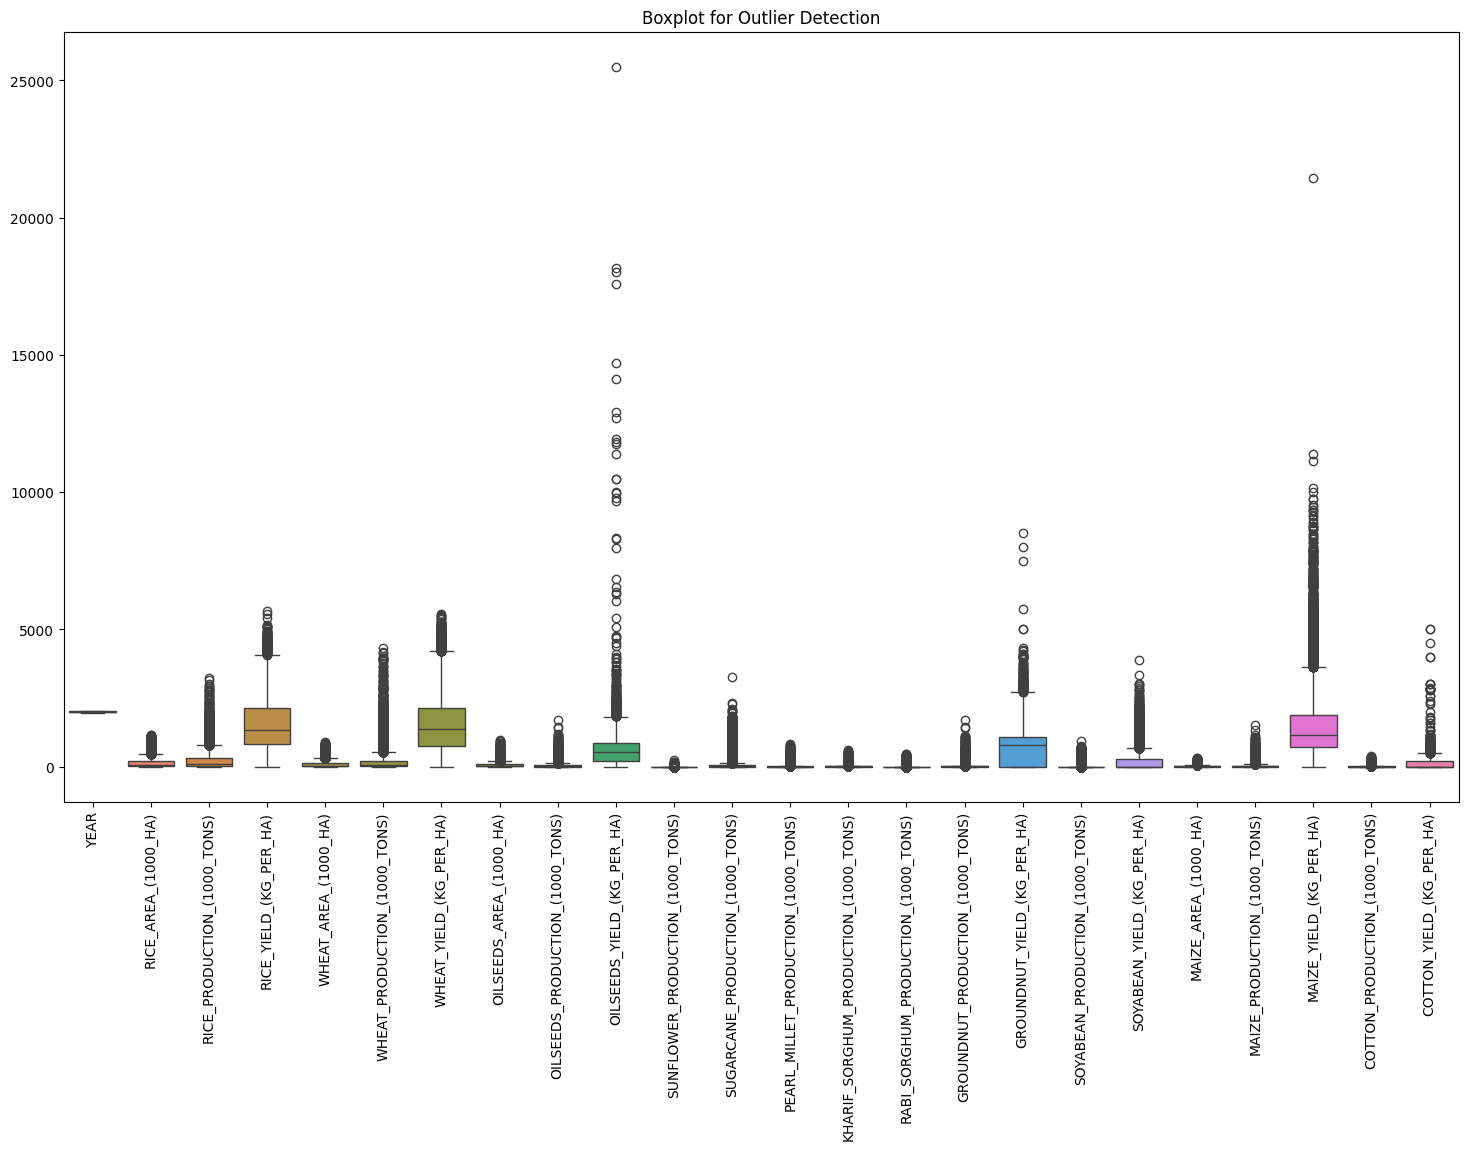

In [ ]:
#Check outlier in my colums using boxplot
plt.figure(figsize=(18, 10))
sns.boxplot(data=cleaned_data[numeric_cols])
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection")
plt.show()


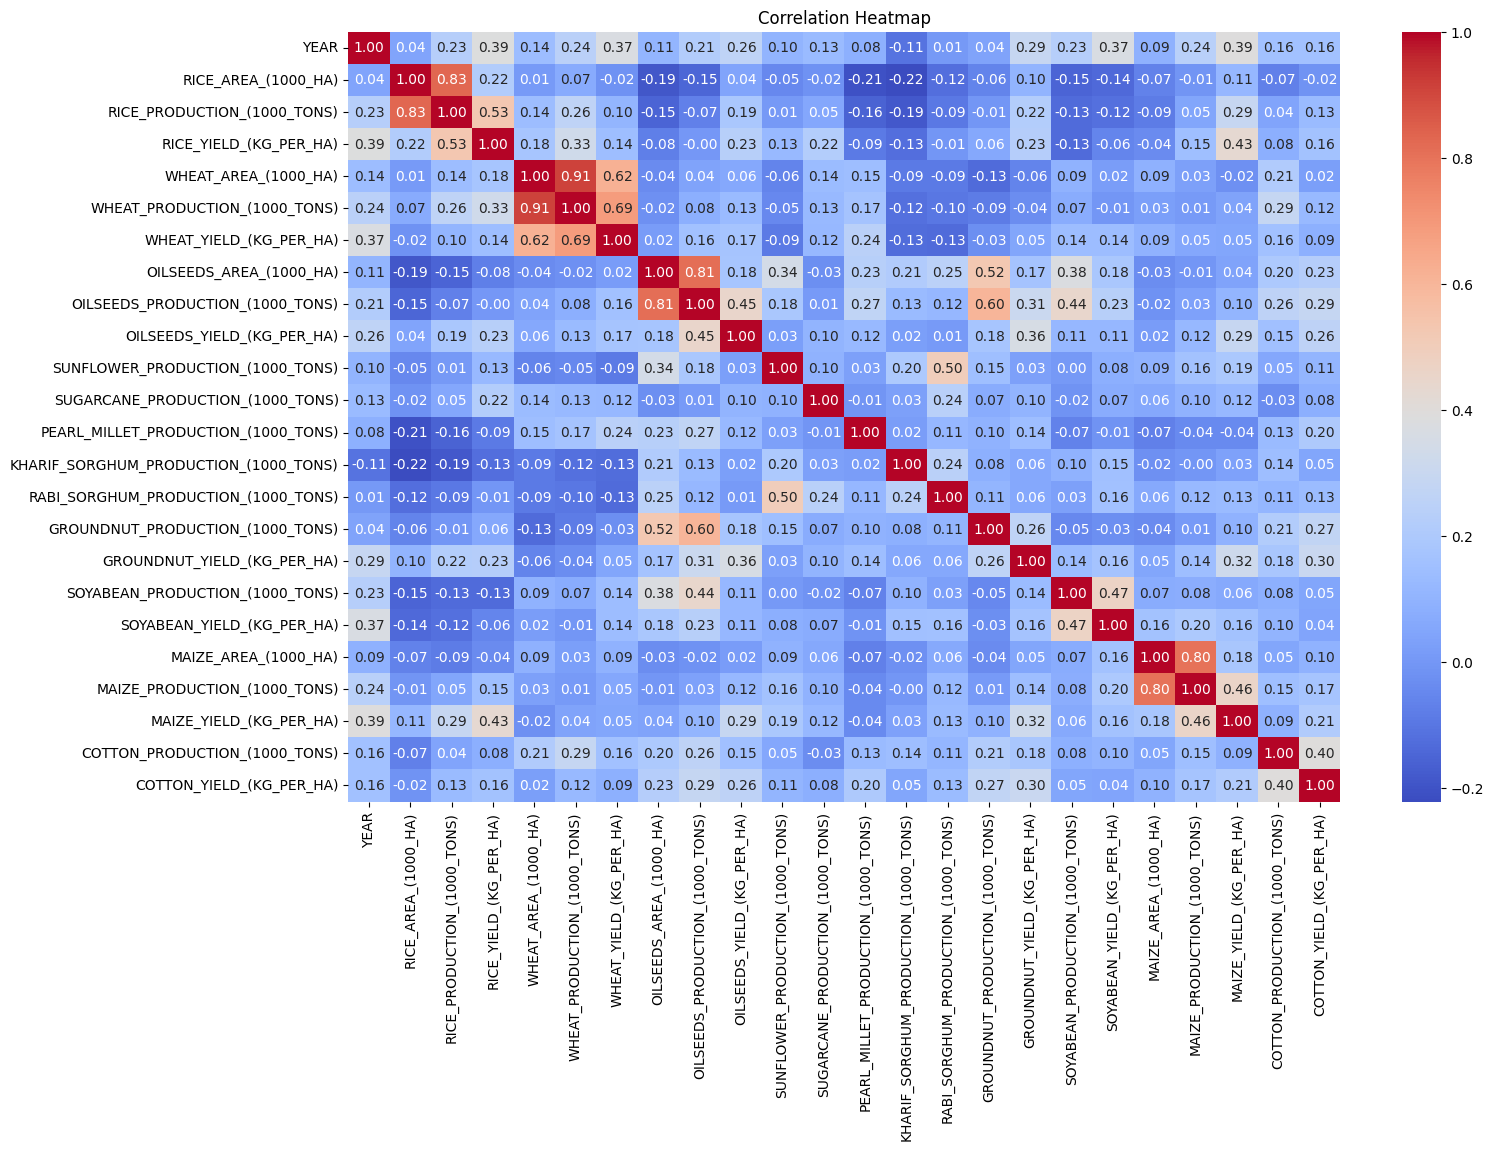

In [44]:
# Correlation heatmap (numeric columns only)
plt.figure(figsize=(16,10))
sns.heatmap(cleaned_data[numeric_cols].corr(), cmap='coolwarm', annot=True,fmt='.2f' )
plt.title("Correlation Heatmap")
plt.show()

In [47]:
# Data Visualization
ds=cleaned_data.copy()

C:\Users\aarulraj\AppData\Local\Temp\ipykernel_19432\1639001448.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q1.values, y=q1.index, palette='Blues_r')


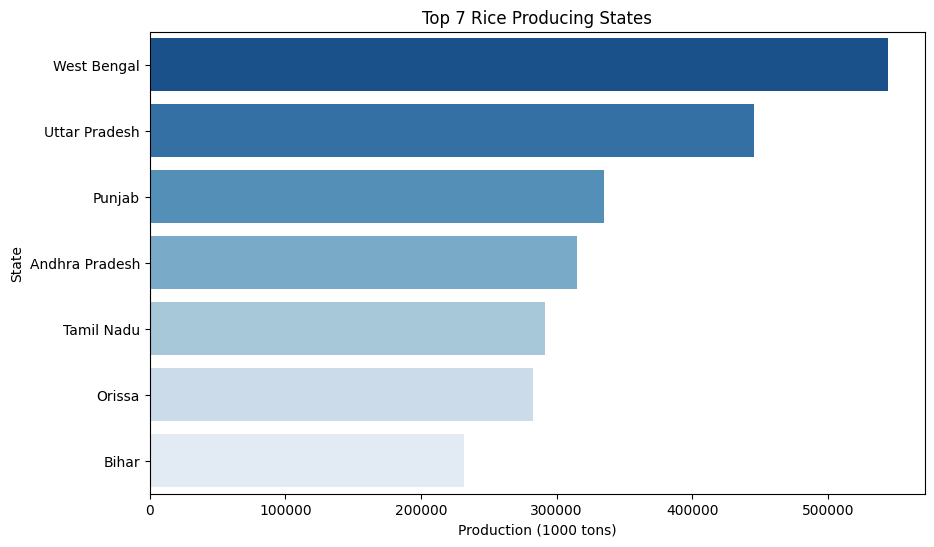

In [56]:
#Top 7 Rice Producing States (Bar Plot)
q1 = ds.groupby('STATE_NAME')['RICE_PRODUCTION_(1000_TONS)'].sum().sort_values(ascending=False).head(7)
plt.figure(figsize=(10,6))
sns.barplot(x=q1.values, y=q1.index, palette='Blues_r')
plt.title("Top 7 Rice Producing States")
plt.xlabel("Production (1000 tons)")
plt.ylabel("State")
plt.show()



C:\Users\aarulraj\AppData\Local\Temp\ipykernel_19432\2208466499.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q2.index, y=q2.values, palette='coolwarm')


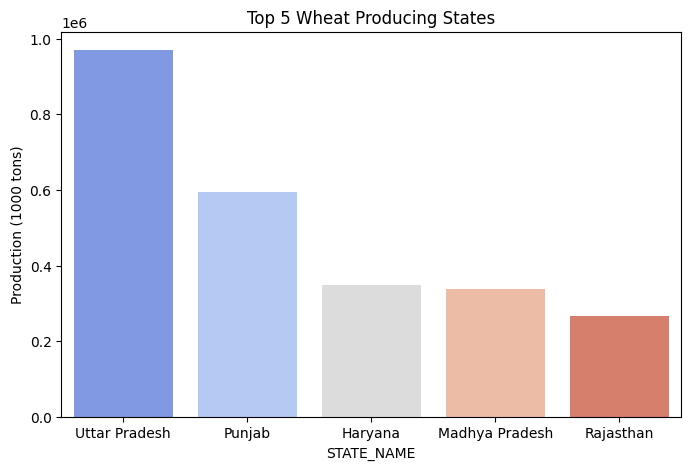

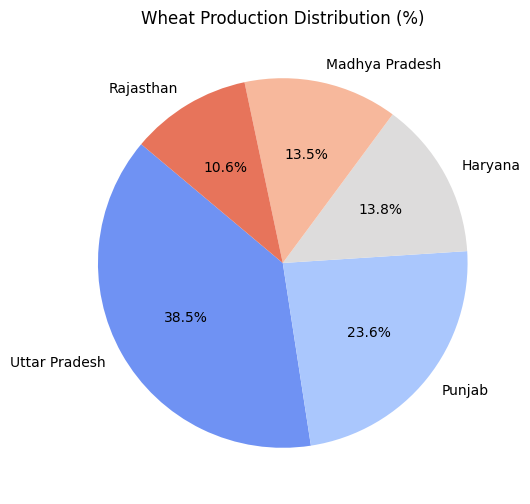

In [ ]:
# Top 5 Wheat Producing States (Bar + Pie)
q2 = ds.groupby('STATE_NAME')['WHEAT_PRODUCTION_(1000_TONS)'].sum().sort_values(ascending=False).head(5)

# Bar chart
plt.figure(figsize=(8,5))
sns.barplot(x=q2.index, y=q2.values, palette='coolwarm')
plt.title("Top 5 Wheat Producing States")
plt.ylabel("Production (1000 tons)")
plt.show()
# Pie chart for percentage
plt.figure(figsize=(6,6))
plt.pie(q2.values, labels=q2.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("coolwarm", 5))
plt.title("Wheat Production Distribution (%)")
plt.show()


C:\Users\aarulraj\AppData\Local\Temp\ipykernel_19432\3310269665.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q3.index, y=q3.values, palette='Oranges')


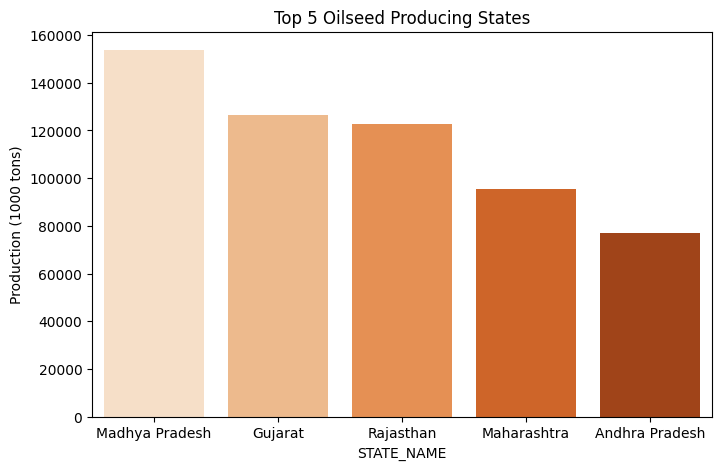

In [63]:
#Oilseed Production by Top 5 States
q3 = ds.groupby('STATE_NAME')['OILSEEDS_PRODUCTION_(1000_TONS)'].sum().sort_values(ascending=False).head(5)
plt.figure(figsize=(8,5))
sns.barplot(x=q3.index, y=q3.values, palette='Oranges')
plt.title("Top 5 Oilseed Producing States")
plt.ylabel("Production (1000 tons)")
plt.show()

C:\Users\aarulraj\AppData\Local\Temp\ipykernel_19432\3319948568.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q4.values, y=q4.index, palette='YlGn_r')


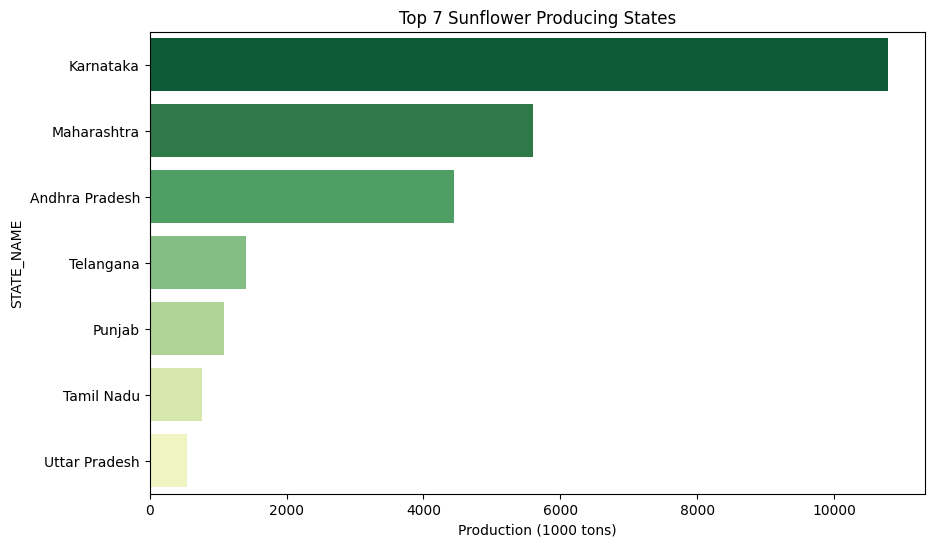

In [70]:
#Top 7 Sunflower Producing States

q4 = ds.groupby('STATE_NAME')['SUNFLOWER_PRODUCTION_(1000_TONS)'].sum().sort_values(ascending=False).head(7)
plt.figure(figsize=(10,6))
sns.barplot(x=q4.values, y=q4.index, palette='YlGn_r')
plt.title("Top 7 Sunflower Producing States")
plt.xlabel("Production (1000 tons)")
plt.show()

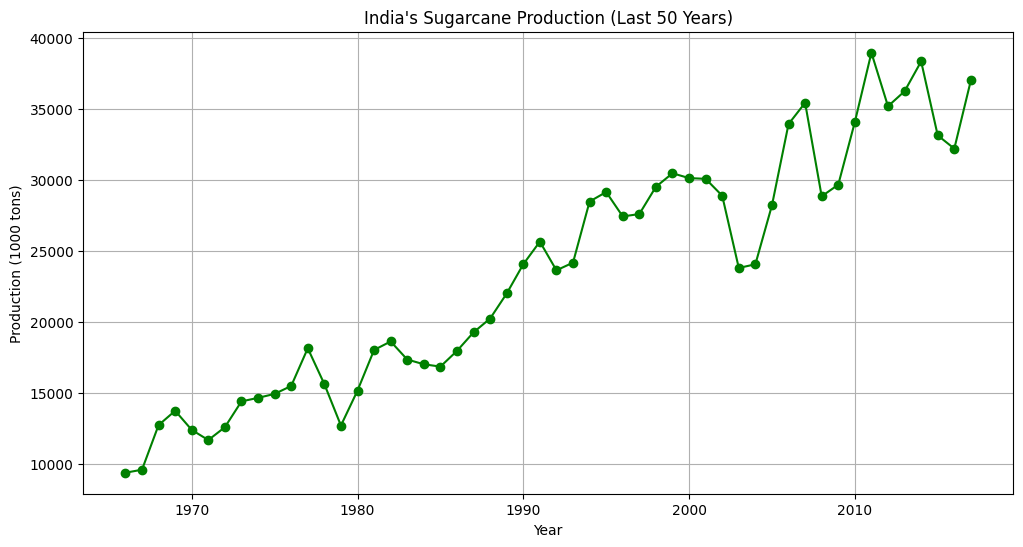

In [76]:
# India's Sugarcane Production Last 50 Years (Line Plot)

q5 = ds.groupby('YEAR')['SUGARCANE_PRODUCTION_(1000_TONS)'].sum()
plt.figure(figsize=(12,6))
plt.plot(q5.index, q5.values, marker='o', color='green')
plt.title("India's Sugarcane Production (Last 50 Years)")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.grid(True)
plt.show()

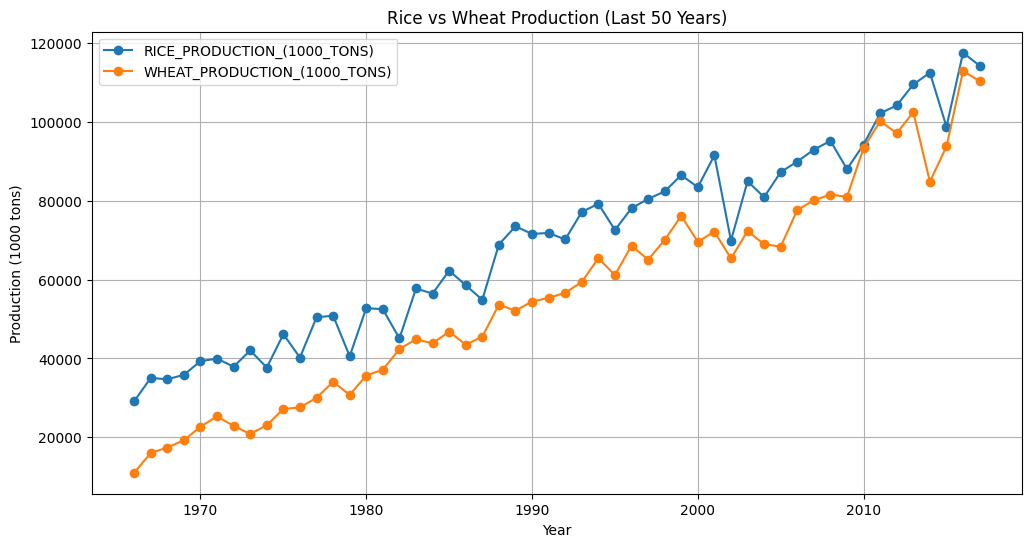

In [77]:
 # Rice vs Wheat Production Last 50 Years
q6 = ds.groupby('YEAR')[['RICE_PRODUCTION_(1000_TONS)','WHEAT_PRODUCTION_(1000_TONS)']].sum()
q6.plot(figsize=(12,6), marker='o')
plt.title("Rice vs Wheat Production (Last 50 Years)")
plt.xlabel("Year")
plt.ylabel("Production (1000 tons)")
plt.grid(True)
plt.show()

C:\Users\aarulraj\AppData\Local\Temp\ipykernel_19432\63895270.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q7.index, y=q7.values, palette="Greens_r")


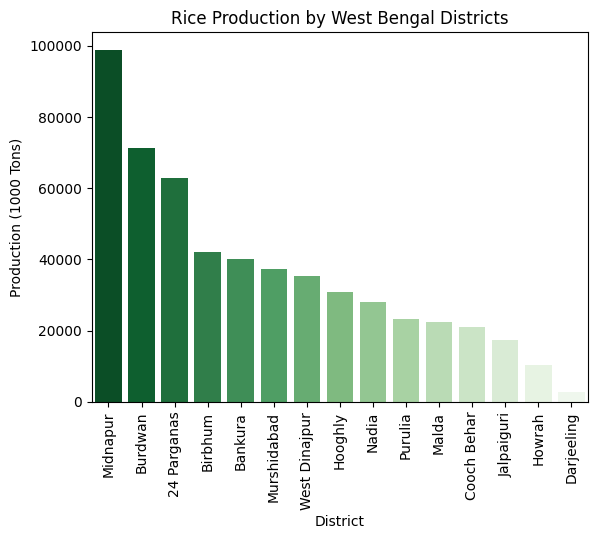

In [85]:
#Rice Production by West Bengal Districts
q7 = ds[ds['STATE_NAME']=='West Bengal'].groupby('DIST_NAME')['RICE_PRODUCTION_(1000_TONS)'].sum().sort_values(ascending=False)
plt.figure()
sns.barplot(x=q7.index, y=q7.values, palette="Greens_r")
plt.title("Rice Production by West Bengal Districts")
plt.xlabel("District")
plt.ylabel("Production (1000 Tons)")
plt.xticks(rotation=90)
plt.show()


C:\Users\aarulraj\AppData\Local\Temp\ipykernel_19432\3119894619.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q8.index, y=q8.values, palette='magma')


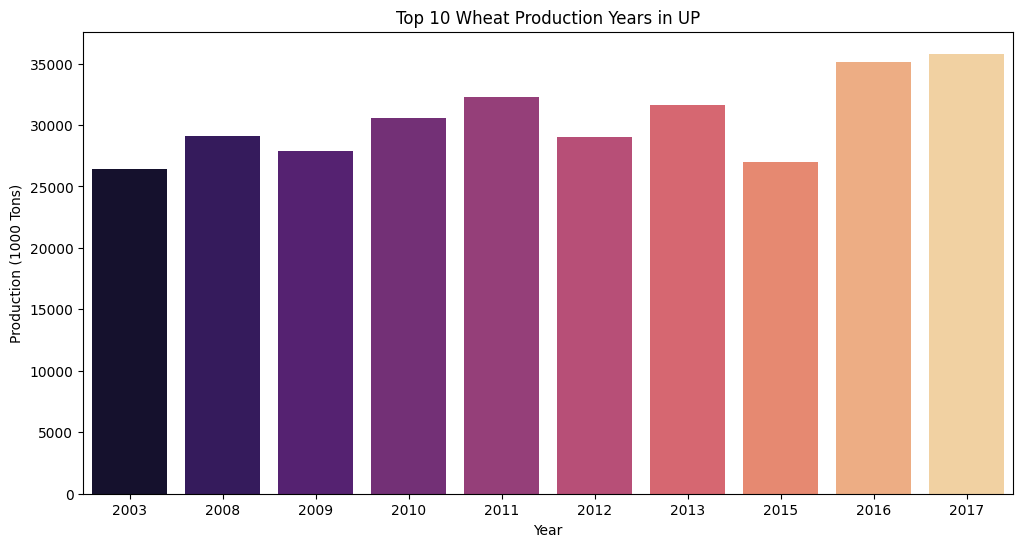

In [ ]:
#Top 10 Wheat Production Years from Uttar Pradesh
q8 = ds[ds['STATE_NAME']=='Uttar Pradesh'].groupby('YEAR')['WHEAT_PRODUCTION_(1000_TONS)'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=q8.index, y=q8.values, palette='magma')
plt.title("Top 10 Wheat Production Years in UP")
plt.xlabel("Year")
plt.ylabel("Production (1000 Tons)")
plt.show()


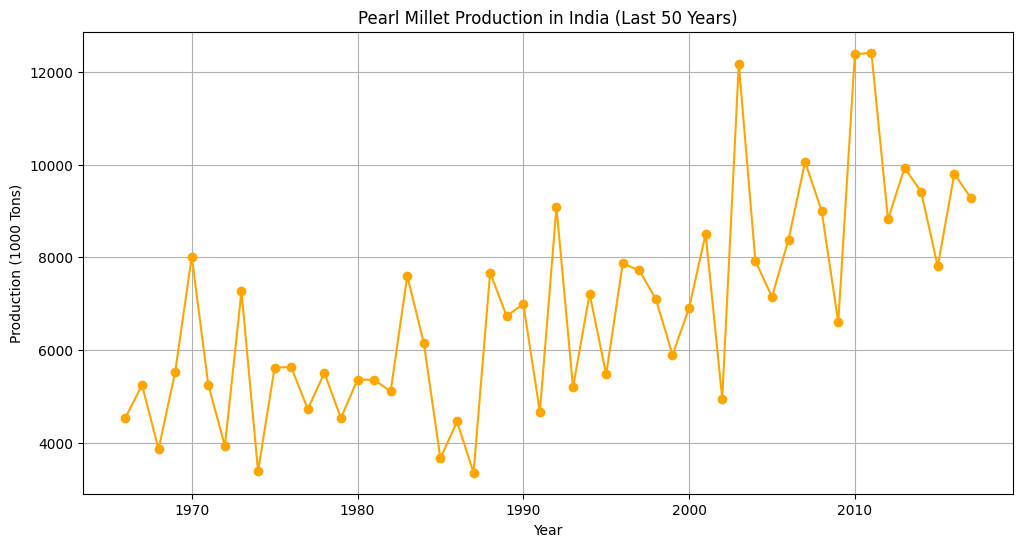

In [93]:
#Millet Production (Last 50 Years)
q9 = ds.groupby('YEAR')['PEARL_MILLET_PRODUCTION_(1000_TONS)'].sum()

plt.figure(figsize=(12,6))
plt.plot(q9.index, q9.values, marker='o', color='orange')
plt.title("Pearl Millet Production in India (Last 50 Years)")
plt.xlabel("Year")
plt.ylabel("Production (1000 Tons)")
plt.grid(True)
plt.show()

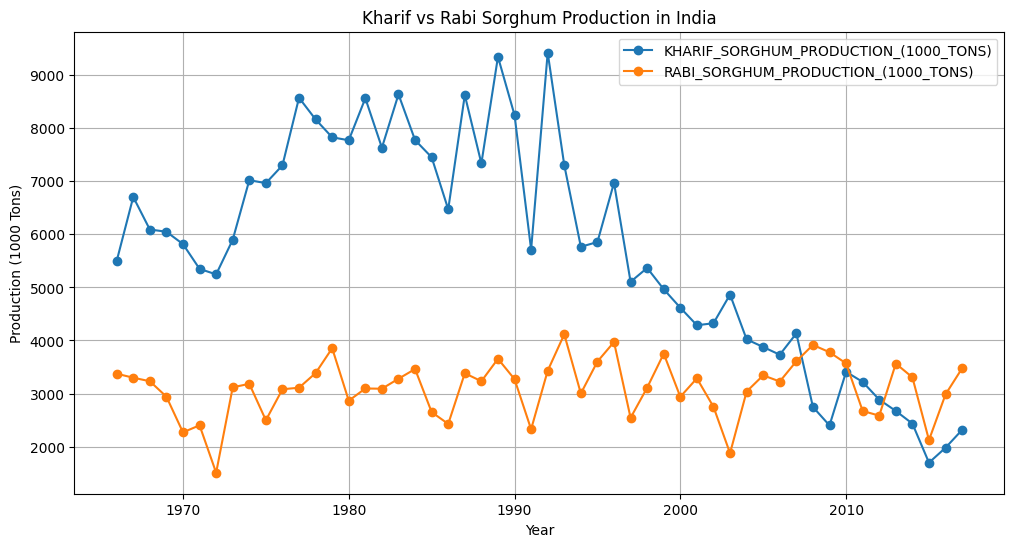

In [98]:
#Sorghum Production (Kharif vs Rabi) by Region
q10 = ds.groupby('YEAR')[['KHARIF_SORGHUM_PRODUCTION_(1000_TONS)','RABI_SORGHUM_PRODUCTION_(1000_TONS)']].sum()

q10.plot(figsize=(12,6), marker='o')
plt.title("Kharif vs Rabi Sorghum Production in India")
plt.xlabel("Year")
plt.ylabel("Production (1000 Tons)")
plt.grid(True)
plt.show()

C:\Users\aarulraj\AppData\Local\Temp\ipykernel_19432\3623616254.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q11.index, y=q11.values, palette='summer')


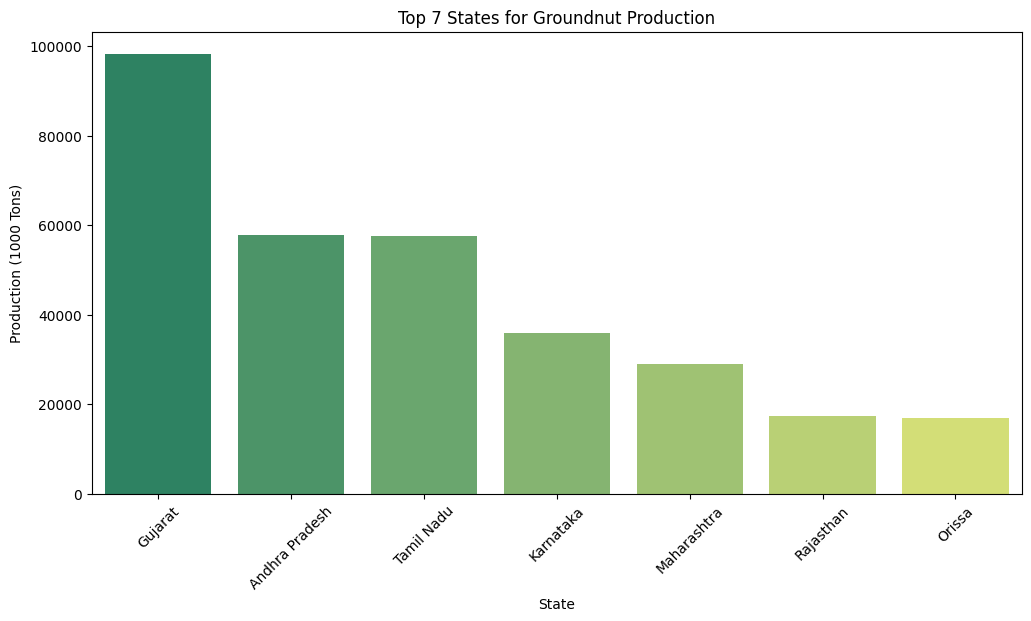

In [97]:
#Top 7 States for Groundnut Production
q11 = ds.groupby('STATE_NAME')['GROUNDNUT_PRODUCTION_(1000_TONS)'].sum().sort_values(ascending=False).head(7)

plt.figure(figsize=(12,6))
sns.barplot(x=q11.index, y=q11.values, palette='summer')
plt.title("Top 7 States for Groundnut Production")
plt.xlabel("State")
plt.ylabel("Production (1000 Tons)")
plt.xticks(rotation=45)
plt.show()


C:\Users\aarulraj\AppData\Local\Temp\ipykernel_19432\1664557726.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=soybean.index, y=soybean['SOYABEAN_PRODUCTION_(1000_TONS)'], ax=ax1, palette='Blues')


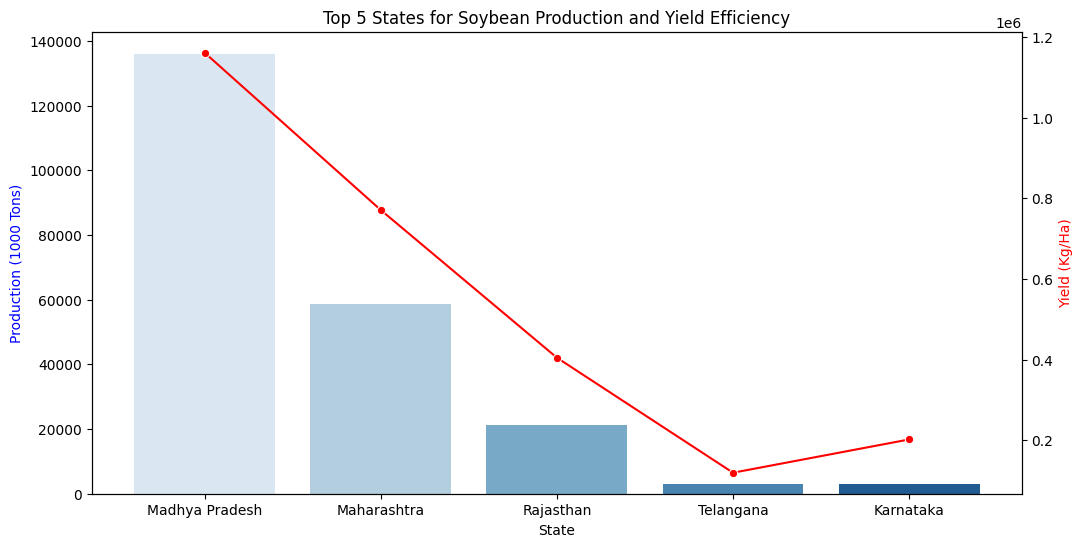

In [96]:
#Soybean Production by Top 5 States with Yield Efficiency 
soybean = ds.groupby('STATE_NAME')[['SOYABEAN_PRODUCTION_(1000_TONS)','SOYABEAN_YIELD_(KG_PER_HA)']].sum().sort_values(by='SOYABEAN_PRODUCTION_(1000_TONS)', ascending=False).head(5)

fig, ax1 = plt.subplots(figsize=(12,6))
sns.barplot(x=soybean.index, y=soybean['SOYABEAN_PRODUCTION_(1000_TONS)'], ax=ax1, palette='Blues')
ax1.set_ylabel("Production (1000 Tons)", color='b')
ax1.set_xlabel("State")
ax1.set_title("Top 5 States for Soybean Production and Yield Efficiency")

ax2 = ax1.twinx()
sns.lineplot(x=soybean.index, y=soybean['SOYABEAN_YIELD_(KG_PER_HA)'], ax=ax2, color='r', marker='o', sort=False)
ax2.set_ylabel("Yield (Kg/Ha)", color='r')
plt.show()


C:\Users\aarulraj\AppData\Local\Temp\ipykernel_19432\3274342272.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=q13.index, y=q13.values, palette='autumn')


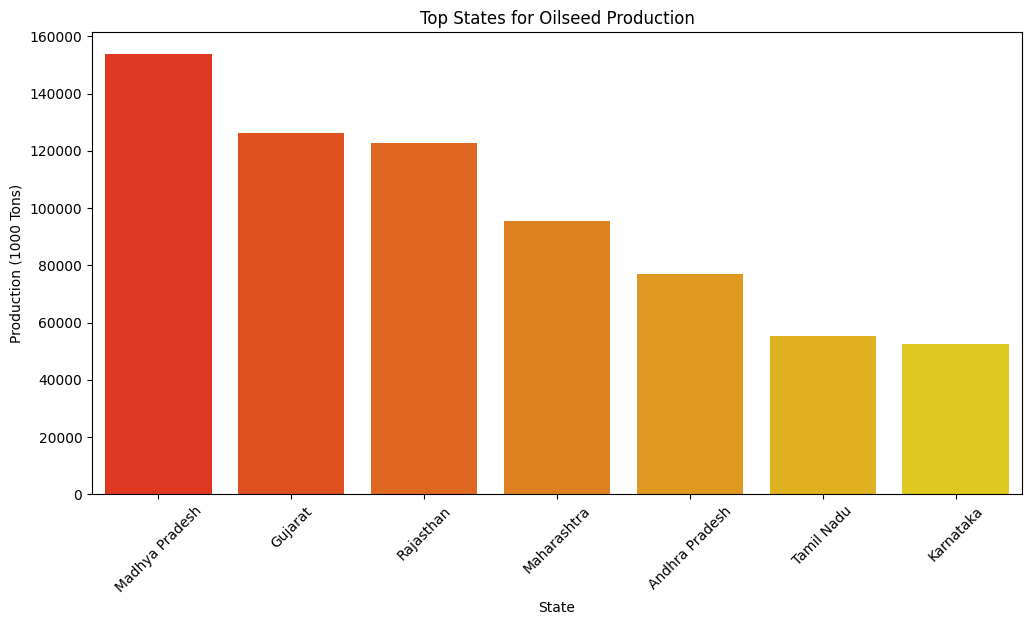

In [95]:
#Oilseed Production in Major States
q13 = ds.groupby('STATE_NAME')['OILSEEDS_PRODUCTION_(1000_TONS)'].sum().sort_values(ascending=False).head(7)

plt.figure(figsize=(12,6))
sns.barplot(x=q13.index, y=q13.values, palette='autumn')
plt.title("Top States for Oilseed Production")
plt.xlabel("State")
plt.ylabel("Production (1000 Tons)")
plt.xticks(rotation=45)
plt.show()


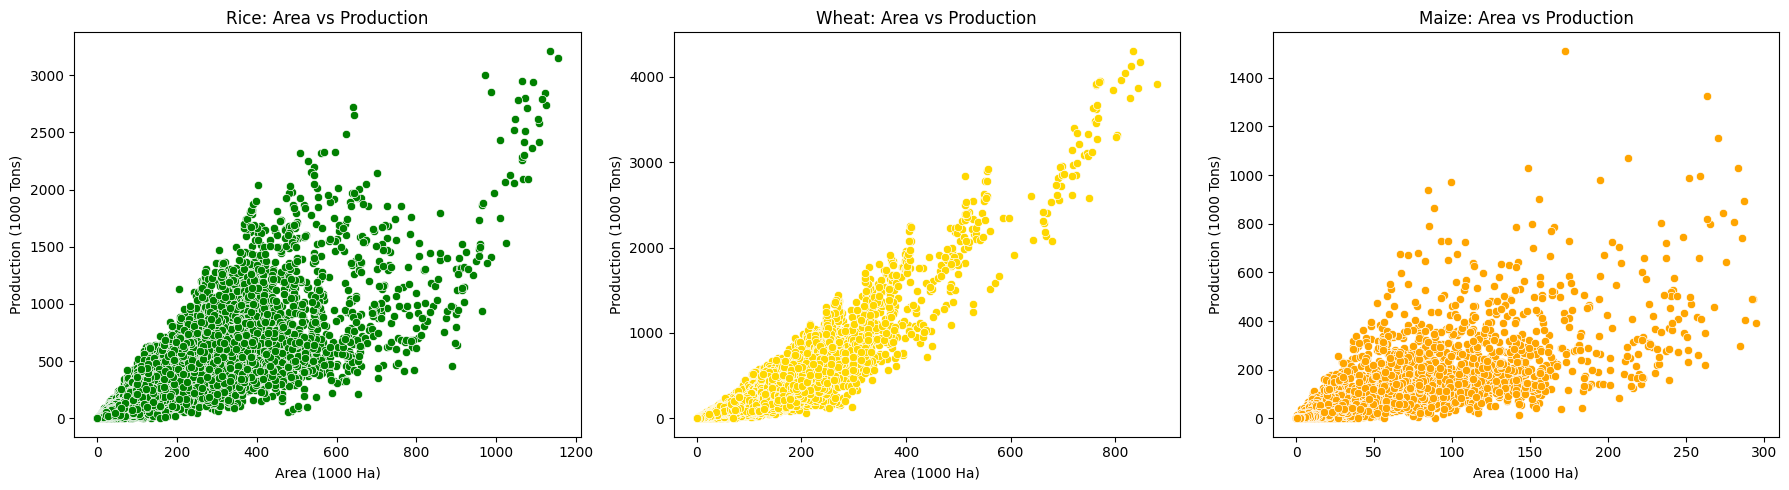

In [ ]:
#Impact of Area Cultivated on Production (Rice, Wheat, Maize)
fig, axes = plt.subplots(1,3, figsize=(18,5))

sns.scatterplot(x='RICE_AREA_(1000_HA)', y='RICE_PRODUCTION_(1000_TONS)', data=ds, ax=axes[0], color='green')
axes[0].set_title("Rice: Area vs Production")
axes[0].set_xlabel("Area (1000 Ha)")
axes[0].set_ylabel("Production (1000 Tons)")

sns.scatterplot(x='WHEAT_AREA_(1000_HA)', y='WHEAT_PRODUCTION_(1000_TONS)', data=ds, ax=axes[1], color='gold')
axes[1].set_title("Wheat: Area vs Production")
axes[1].set_xlabel("Area (1000 Ha)")
axes[1].set_ylabel("Production (1000 Tons)")

sns.scatterplot(x='MAIZE_AREA_(1000_HA)', y='MAIZE_PRODUCTION_(1000_TONS)', data=ds, ax=axes[2], color='orange')
axes[2].set_title("Maize: Area vs Production")
axes[2].set_xlabel("Area (1000 Ha)")
axes[2].set_ylabel("Production (1000 Tons)")

plt.tight_layout()
plt.show()


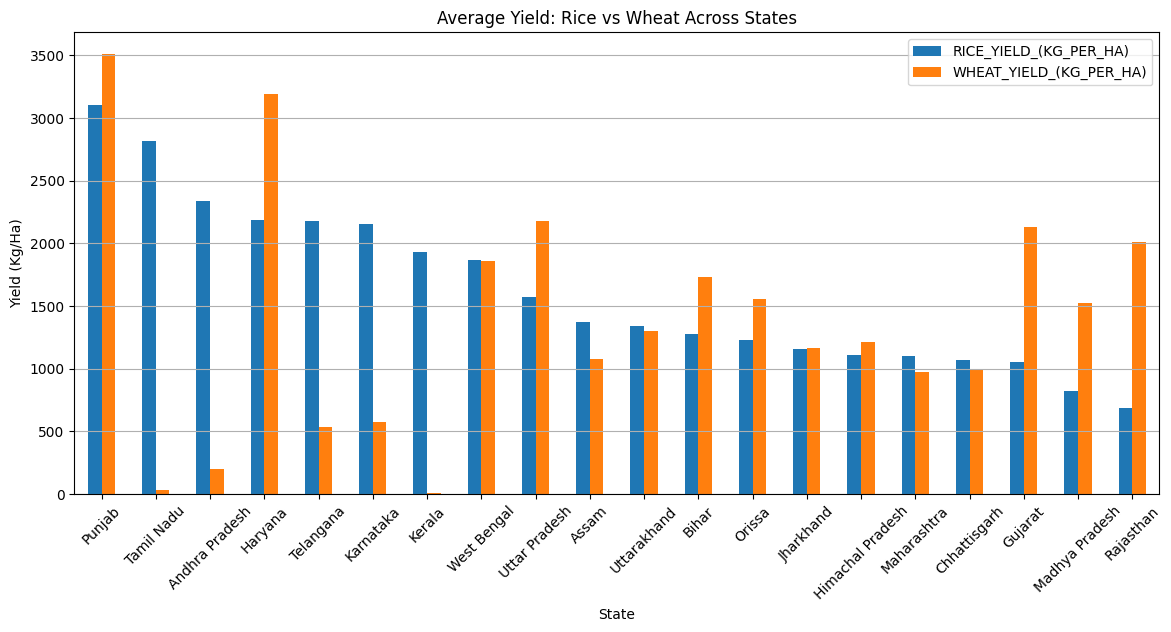

In [92]:
#Rice vs Wheat Yield Across States 

q14 = ds.groupby('STATE_NAME')[['RICE_YIELD_(KG_PER_HA)','WHEAT_YIELD_(KG_PER_HA)']].mean().sort_values(by='RICE_YIELD_(KG_PER_HA)', ascending=False)

q14.plot(kind='bar', figsize=(14,6))
plt.title("Average Yield: Rice vs Wheat Across States")
plt.xlabel("State")
plt.ylabel("Yield (Kg/Ha)")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


In [ ]:
##Connect the MYSQL to create the table for my data structure 
import mysql.connector

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Arul@123",
  auth_plugin='mysql_native_password'
)

mycursor = mydb.cursor()
mycursor.execute('use agri;')

create_table_query = """
CREATE TABLE Agriculture (
    Pk_id INT AUTO_INCREMENT PRIMARY KEY,
    YEAR INT,
    STATE_NAME VARCHAR(100),
    DIST_NAME VARCHAR(100),
    RICE_AREA_1000_HA FLOAT,
    RICE_PRODUCTION_1000_TONS FLOAT,
    RICE_YIELD_KG_PER_HA FLOAT,
    WHEAT_AREA_1000_HA FLOAT,
    WHEAT_PRODUCTION_1000_TONS FLOAT,
    WHEAT_YIELD_KG_PER_HA FLOAT,
    OILSEEDS_AREA_1000_HA FLOAT,
    OILSEEDS_PRODUCTION_1000_TONS FLOAT,
    OILSEEDS_YIELD_KG_PER_HA FLOAT,
    SUNFLOWER_PRODUCTION_1000_TONS FLOAT,
    SUGARCANE_PRODUCTION_1000_TONS FLOAT,
    PEARL_MILLET_PRODUCTION_1000_TONS FLOAT,
    KHARIF_SORGHUM_PRODUCTION_1000_TONS FLOAT,
    RABI_SORGHUM_PRODUCTION_1000_TONS FLOAT,
    GROUNDNUT_PRODUCTION_1000_TONS FLOAT,
    GROUNDNUT_YIELD_KG_PER_HA FLOAT,
    SOYABEAN_PRODUCTION_1000_TONS FLOAT,
    SOYABEAN_YIELD_KG_PER_HA FLOAT,
    MAIZE_AREA_1000_HA FLOAT,
    MAIZE_PRODUCTION_1000_TONS FLOAT,
    MAIZE_YIELD_KG_PER_HA FLOAT,
    COTTON_PRODUCTION_1000_TONS FLOAT,
    COTTON_YIELD_KG_PER_HA FLOAT
);
"""


mycursor.execute(create_table_query)
mydb.commit()
mycursor.close()
mydb.close()

print("Table 'Agriculture' created successfully!")


In [103]:
##Connect the MYSQL insert the excel data into my table 

mydb = mysql.connector.connect(
  host="localhost",
  user="root",
  password="Arul@123",
  auth_plugin='mysql_native_password'
)

mycursor = mydb.cursor()
mycursor.execute('use agri;')


insert_query = """
INSERT INTO Agriculture (
    YEAR,
    STATE_NAME,
    DIST_NAME,
    RICE_AREA_1000_HA,
    RICE_PRODUCTION_1000_TONS,
    RICE_YIELD_KG_PER_HA,
    WHEAT_AREA_1000_HA,
    WHEAT_PRODUCTION_1000_TONS,
    WHEAT_YIELD_KG_PER_HA,
    OILSEEDS_AREA_1000_HA,
    OILSEEDS_PRODUCTION_1000_TONS,
    OILSEEDS_YIELD_KG_PER_HA,
    SUNFLOWER_PRODUCTION_1000_TONS,
    SUGARCANE_PRODUCTION_1000_TONS,
    PEARL_MILLET_PRODUCTION_1000_TONS,
    KHARIF_SORGHUM_PRODUCTION_1000_TONS,
    RABI_SORGHUM_PRODUCTION_1000_TONS,
    GROUNDNUT_PRODUCTION_1000_TONS,
    GROUNDNUT_YIELD_KG_PER_HA,
    SOYABEAN_PRODUCTION_1000_TONS,
    SOYABEAN_YIELD_KG_PER_HA,
    MAIZE_AREA_1000_HA,
    MAIZE_PRODUCTION_1000_TONS,
    MAIZE_YIELD_KG_PER_HA,
    COTTON_PRODUCTION_1000_TONS,
    COTTON_YIELD_KG_PER_HA
) VALUES (
    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
    %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s
)
"""
data_tuples = [
    (
        row['YEAR'],
        row['STATE_NAME'],
        row['DIST_NAME'],
        row['RICE_AREA_(1000_HA)'],
        row['RICE_PRODUCTION_(1000_TONS)'],
        row['RICE_YIELD_(KG_PER_HA)'],
        row['WHEAT_AREA_(1000_HA)'],
        row['WHEAT_PRODUCTION_(1000_TONS)'],
        row['WHEAT_YIELD_(KG_PER_HA)'],
        row['OILSEEDS_AREA_(1000_HA)'],
        row['OILSEEDS_PRODUCTION_(1000_TONS)'],
        row['OILSEEDS_YIELD_(KG_PER_HA)'],
        row['SUNFLOWER_PRODUCTION_(1000_TONS)'],
        row['SUGARCANE_PRODUCTION_(1000_TONS)'],
        row['PEARL_MILLET_PRODUCTION_(1000_TONS)'],
        row['KHARIF_SORGHUM_PRODUCTION_(1000_TONS)'],
        row['RABI_SORGHUM_PRODUCTION_(1000_TONS)'],
        row['GROUNDNUT_PRODUCTION_(1000_TONS)'],
        row['GROUNDNUT_YIELD_(KG_PER_HA)'],
        row['SOYABEAN_PRODUCTION_(1000_TONS)'],
        row['SOYABEAN_YIELD_(KG_PER_HA)'],
        row['MAIZE_AREA_(1000_HA)'],
        row['MAIZE_PRODUCTION_(1000_TONS)'],
        row['MAIZE_YIELD_(KG_PER_HA)'],
        row['COTTON_PRODUCTION_(1000_TONS)'],
        row['COTTON_YIELD_(KG_PER_HA)']
    )
    for _, row in cleaned_data.iterrows()
]


mycursor.executemany(insert_query, data_tuples)

mydb.commit()
mycursor.close()
mydb.close()

ProgrammingError: 1054 (42S22): Unknown column 'YEAR' in 'field list'

In [102]:
cleaned_data.columns

Index(['YEAR', 'STATE_NAME', 'DIST_NAME', 'RICE_AREA_(1000_HA)',
       'RICE_PRODUCTION_(1000_TONS)', 'RICE_YIELD_(KG_PER_HA)',
       'WHEAT_AREA_(1000_HA)', 'WHEAT_PRODUCTION_(1000_TONS)',
       'WHEAT_YIELD_(KG_PER_HA)', 'OILSEEDS_AREA_(1000_HA)',
       'OILSEEDS_PRODUCTION_(1000_TONS)', 'OILSEEDS_YIELD_(KG_PER_HA)',
       'SUNFLOWER_PRODUCTION_(1000_TONS)', 'SUGARCANE_PRODUCTION_(1000_TONS)',
       'PEARL_MILLET_PRODUCTION_(1000_TONS)',
       'KHARIF_SORGHUM_PRODUCTION_(1000_TONS)',
       'RABI_SORGHUM_PRODUCTION_(1000_TONS)',
       'GROUNDNUT_PRODUCTION_(1000_TONS)', 'GROUNDNUT_YIELD_(KG_PER_HA)',
       'SOYABEAN_PRODUCTION_(1000_TONS)', 'SOYABEAN_YIELD_(KG_PER_HA)',
       'MAIZE_AREA_(1000_HA)', 'MAIZE_PRODUCTION_(1000_TONS)',
       'MAIZE_YIELD_(KG_PER_HA)', 'COTTON_PRODUCTION_(1000_TONS)',
       'COTTON_YIELD_(KG_PER_HA)'],
      dtype='object')